In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv('Influencer.csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [40]:
df.shape

(200, 10)

In [41]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [42]:
df['Country Or Region'].value_counts()

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country Or Region, dtype: int64

In [43]:
# Filling the NULL values with the O/P
df['Country Or Region'].mode()

0    United States
Name: Country Or Region, dtype: object

In [44]:
df['Country Or Region'] = (df['Country Or Region'].fillna('United States'))

In [45]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [46]:
df['Channel Info'] = df['Channel Info'].str.replace('\n', '')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,United States
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,danbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,raisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,luansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [47]:
# Converting the alphabets that are included in the Data
df['Followers'] = df['Followers'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Avg. Likes'] = df['Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Posts'] = df['Posts'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].replace({"k":"*1e3", "m":"*1e6"}, regex=True).map(df.eval)
df['Total Likes'] = df['Total Likes'].replace({"m":"*1e6", "b":"*1e9"}, regex=True).map(df.eval)
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,danbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,raisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,luansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [48]:
# 1. Are there any correlated features in the given dataset? If yes, state the correlation
# coefficient of the pair of features which are highly correlated

cor = df.corr().abs()
cor

C:\Users\Vignesh Rao\AppData\Local\Temp\ipykernel_32476\2515587097.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr().abs()


,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,0.354843,0.698193,0.277699,0.058132,0.028900,0.272323,0.465119
Influence Score,0.354843,1.000000,0.365428,0.048502,0.168287,0.072460,0.040011,0.234987
Followers,0.698193,0.365428,1.000000,0.346829,0.069171,0.107439,0.260764,0.667546
Avg. Likes,0.277699,0.048502,0.346829,1.000000,0.348795,0.789359,0.892784,0.361296
Posts,0.058132,0.168287,0.069171,0.348795,1.000000,0.334047,0.285154,0.232038
60-Day Eng Rate,0.028900,0.072460,0.107439,0.789359,0.334047,1.000000,0.866293,0.001560
New Post Avg. Likes,0.272323,0.040011,0.260764,0.892784,0.285154,0.866293,1.000000,0.351335
Total Likes,0.465119,0.234987,0.667546,0.361296,0.232038,0.001560,0.351335,1.000000


In [49]:
df[['New Post Avg. Likes','Avg. Likes']].corr()

,New Post Avg. Likes,Avg. Likes
New Post Avg. Likes,1.000000,0.892784
Avg. Likes,0.892784,1.000000


<Axes: >

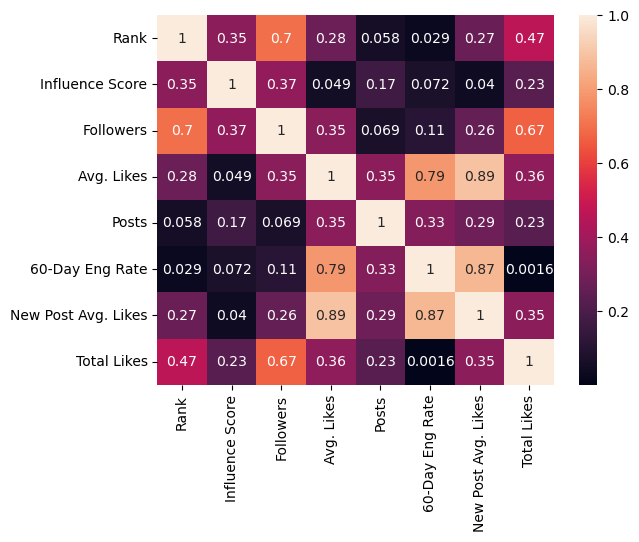

In [50]:
sns.heatmap(cor, annot = True)

In [51]:
# So the Highly Correlated Feature(Pair)
df["New Post Avg. Likes"].corr(df["Avg. Likes"])

0.8927840403263658

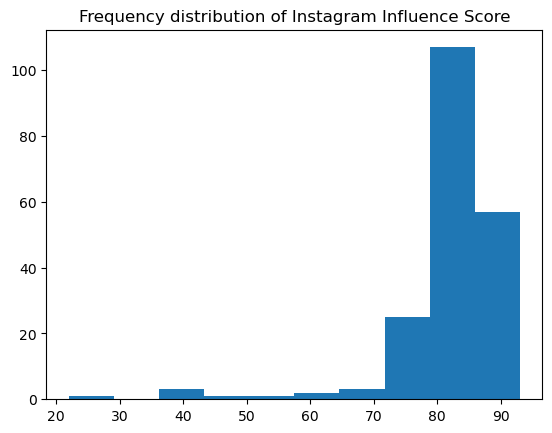

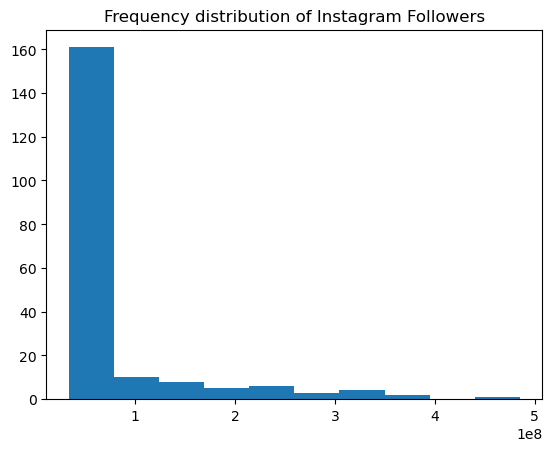

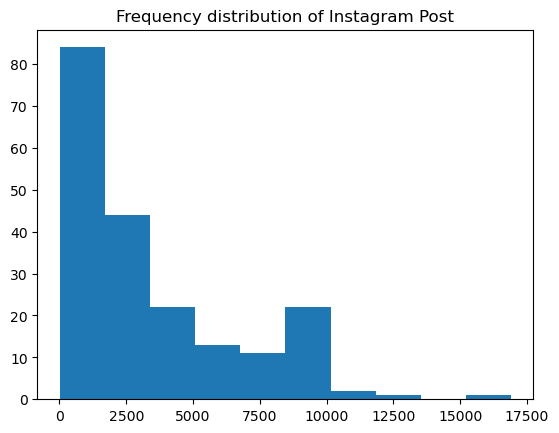

In [52]:
# 2. Frequency Distribution of Influence Score, Followers and Posts.
plt.hist(df['Influence Score'])
plt.title('Frequency distribution of Instagram Influence Score')
plt.show()

#Checking for the frequency in Followers column
plt.hist(df['Followers'])
plt.title('Frequency distribution of Instagram Followers')
plt.show()

#Checking for the frequency in posts column
plt.hist(df['Posts'])
plt.title('Frequency distribution of Instagram Post')
plt.show()

Country that has Higher No.of Influencers: United States


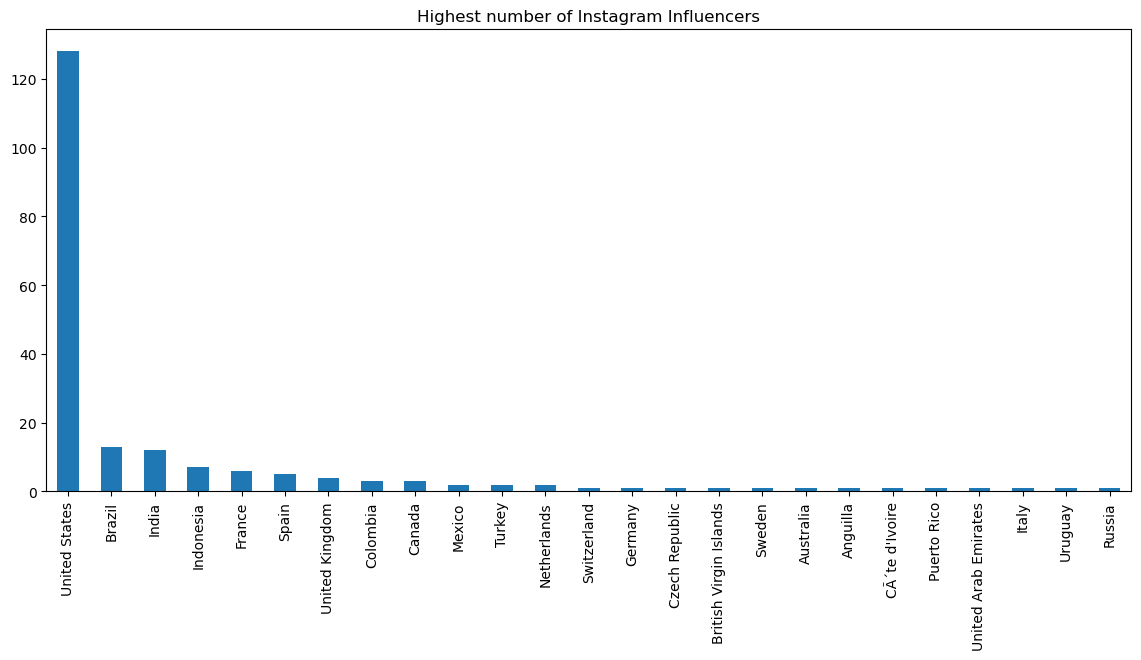

In [53]:
# 3. Which country houses the highest number of Instagram Influencers? Please show the
# count of Instagram influencers in different countries using barchart.
ans = df["Country Or Region"].mode()
print('Country that has Higher No.of Influencers:', ans.to_string(index=False))
df["Country Or Region"].value_counts().plot.bar(figsize=(14, 6))
plt.title('Highest number of Instagram Influencers')
plt.show()

In [54]:
# 4. Who are the top 10 influencers in the given dataset based on the following features Followers, Average Likes and Total Likes...
ans4_df = df[["Channel Info","Followers","Avg. Likes","Total Likes"]].sort_values(by =["Followers","Avg. Likes","Total Likes"], ascending = False)
ans4_df[0:10]

,Channel Info,Followers,Avg. Likes,Total Likes
0,cristiano,485200000.0,8700000.0,2.910000e+10
1,kyliejenner,370700000.0,8200000.0,5.740000e+10
2,leomessi,363900000.0,6700000.0,6.100000e+09
3,selenagomez,348800000.0,6100000.0,1.140000e+10
4,therock,339400000.0,1800000.0,1.260000e+10
5,arianagrande,333000000.0,3700000.0,1.850000e+10
6,kimkardashian,330700000.0,3500000.0,1.980000e+10
7,beyonce,276100000.0,3600000.0,7.300000e+09
8,khloekardashian,273900000.0,2400000.0,9.800000e+09
9,justinbieber,260000000.0,1900000.0,1.400000e+10


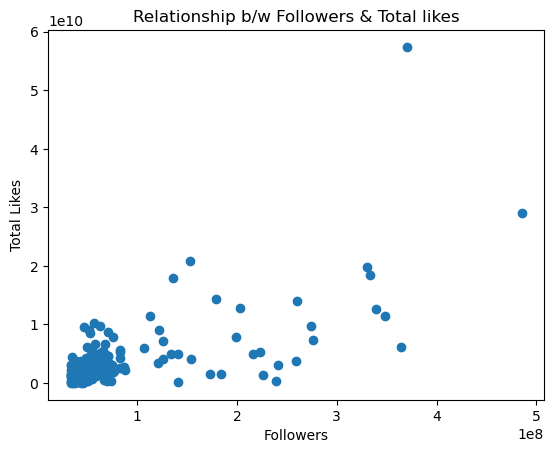

In [58]:
# 5. Describe the relationship between the following pairs of features using a suitable graph
# I. Followers and Total Likes

plt.scatter(df['Followers'],df['Total Likes'])
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship b/w Followers & Total likes')
plt.show()

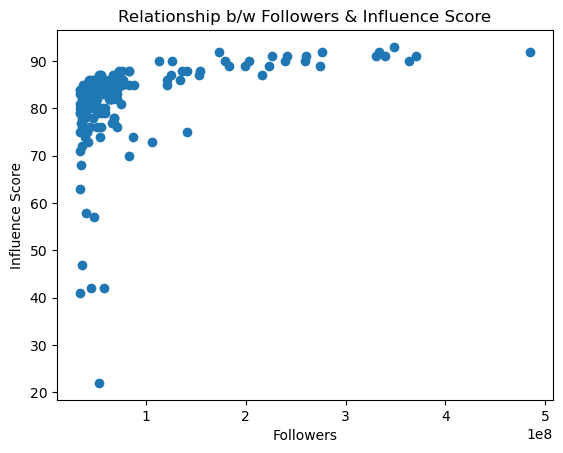

In [57]:
# II. Followers and Influence Score
plt.scatter(df['Followers'],df['Influence Score'])
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship b/w Followers & Influence Score')
plt.show()

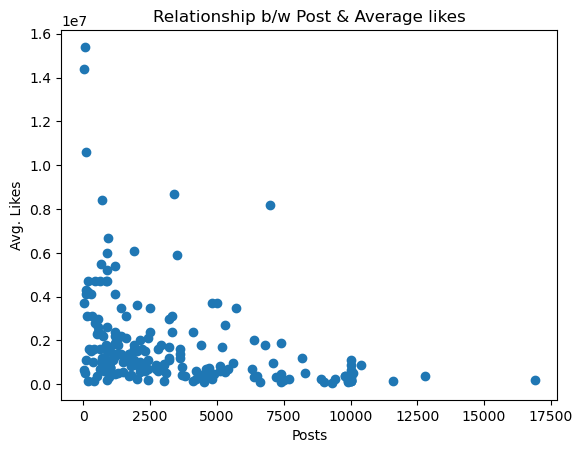

In [59]:
# III. Posts and Average likes
plt.scatter(df['Posts'], df['Avg. Likes'])
plt.xlabel('Posts')
plt.ylabel('Avg. Likes')
plt.title('Relationship b/w Post & Average likes')
plt.show()

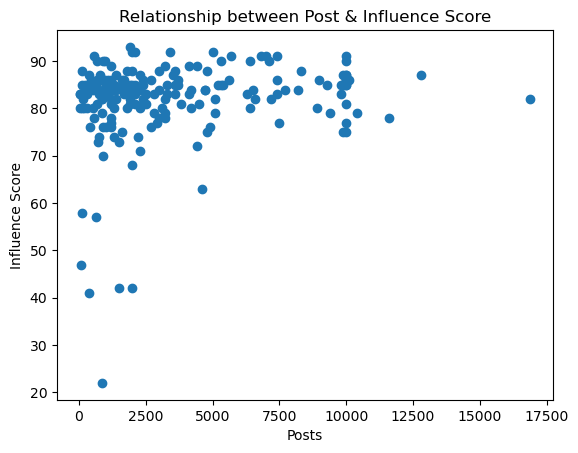

In [60]:
# IV. Posts and Influence Score
plt.scatter(df['Posts'], df['Influence Score'])
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Post & Influence Score')
plt.show()